In [8]:
# appliances = ['dish washer']
appliances = ['kettle', 'toaster', 'dish washer']

#air dryer nao tem na casa 2?
#tirar hair dryer e audio amplifier!!!
#falta testar onde fica o dropout da ann!!

# techniques = ['logisticRegression' 'KNN', 'SVM', 'SGD', 'randomForest', 'perceptron']
# techniques = ['ANN', 'CNN', 'GRU']
techniques = ['ANN', 'CNN', 'GRU', 'logisticRegression', 'KNN', 'SVM', 'SGD', 'randomForest', 'perceptron']

thresholds_roc = {}
thresholds_pr = {'kettle':{}, 'toaster':{}, 'dish washer':{}}


homes = ['test',1,2,5]
# homes = ['test',1]

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20, 8)

In [9]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score              # Calculate the F-score

def calculate_metrics(dataset, results_df):
    dataset["ligado"] = dataset["ligado"].astype(int)
    y = dataset.loc[:,('ligado')].values
    y_pred = dataset.loc[:,('saidas')].values

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    P = 0
    N = 0

    for i in range(len(y)):
        if y_pred[i] == y[i]:
            if y_pred[i] == True:
                TP += 1
                P += 1
            else:
                TN += 1
                N += 1
        else:
            if y_pred[i] == True:
                FP += 1
                N += 1
            else:
                FN += 1
                P += 1
    
    # if TP+FN == 0:
    #     recall = 'inf'
    # else:
    #     recall = TP/(TP+FN)

    # if TP+FP == 0:
    #     precision = 'inf'
    # else:
    #     precision = TP/(TP+FP)

    # accuracy = (TP+TN)/(P+N)

    # if precision == 'inf' or recall == 'inf':
    #     f1 = 0
    # elif precision+recall == 0:
    #     f1 = 'inf'
    # else:
    #     f1 = 2*(precision*recall)/(precision+recall)

    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)

    results_df = results_df.append({'app': app, 'tec':tec, 'house':house, 'recall':recall, 'accuracy':accuracy, 'precision':precision, 'f1':f1, 'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN, 'P':P, 'N':N}, ignore_index=True)
    # results_df = results_df.append({'app': app, 'tec':tec, 'house':house, 'recall':recall, 'accuracy':accuracy, 'precision':precision, 'f1':f1}, ignore_index=True)

    return results_df

In [10]:
def save_df_into_csv(df, dp_tec, appliance, house, is_test=False):
    if is_test == True:
        nome_arquivo = 'saida_teste_' #TODO

    else:
        nome_arquivo = 'saida_casa_' + str(house) + '_'

    nome_appliance = appliance.replace(' ', '_')
    nome_arquivo = 'results/csv/'+nome_arquivo + dp_tec + '_' + nome_appliance + '_complete.csv'

    df.to_csv(nome_arquivo, sep=',', header=True, index=True)
    return True


def open_csv_as_df(dp_tec, appliance, house, is_test=False):
    if is_test == True:
        nome_arquivo = 'saida_teste_'
    else:
        nome_arquivo = 'saida_casa_' + str(house) + '_'
    nome_appliance = appliance.replace(' ', '_')
    nome_arquivo = 'results/csv/'+nome_arquivo + dp_tec + '_' + nome_appliance + '_v2.csv'
    df = pd.read_csv(nome_arquivo, sep=',')
    return df

ANN


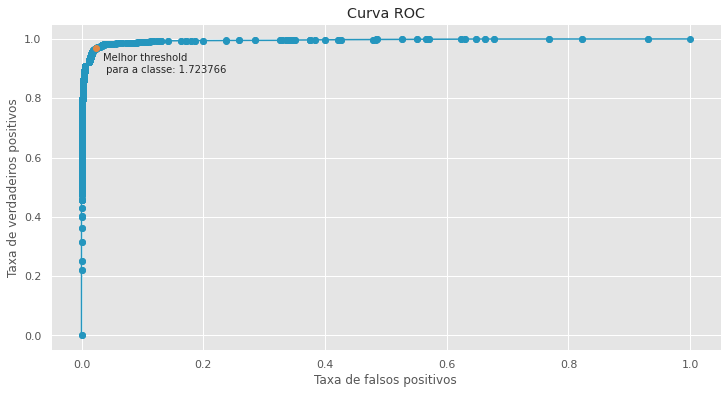

Best Threshold=0.962123, F-Score=0.805
Best 2o Threshold=1.723766, F-Score=0.784


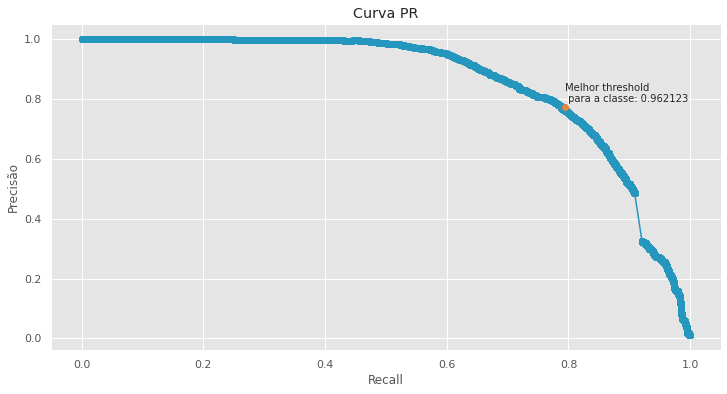

outra tentativa 0.8577031146694021
1.6346742548048496
CNN


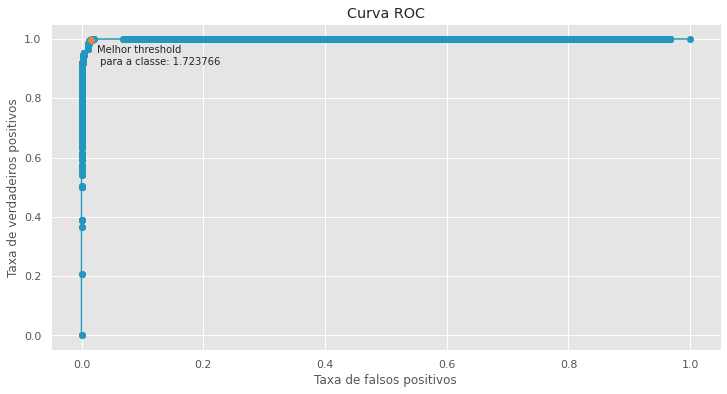

Best Threshold=1.148224, F-Score=0.890
Best 2o Threshold=1.795645, F-Score=0.888


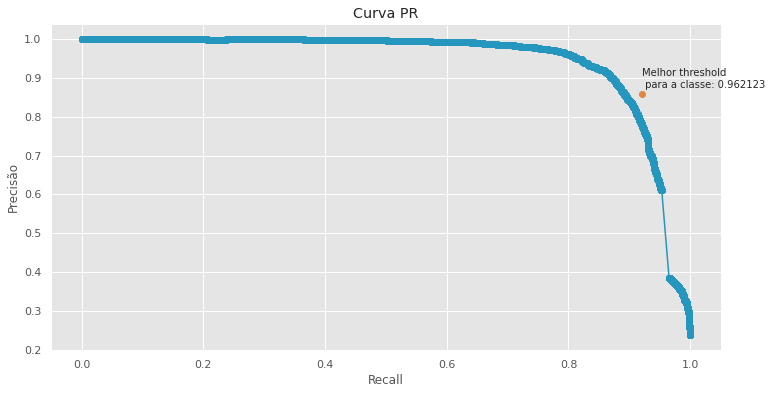

outra tentativa 0.9442539628177162
1.5099126072600484
GRU


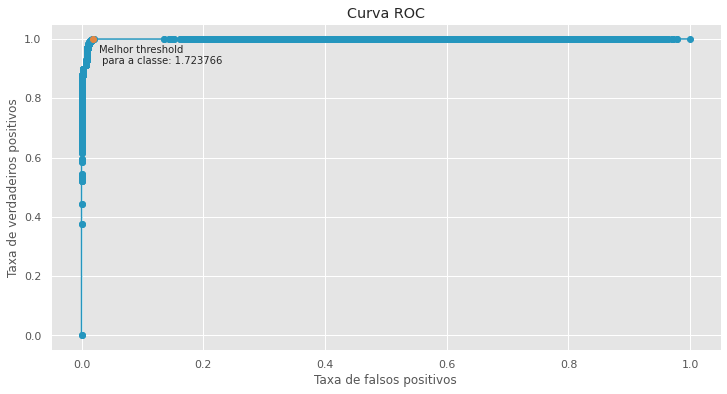

Best Threshold=0.006388, F-Score=0.863
Best 2o Threshold=0.646067, F-Score=0.847


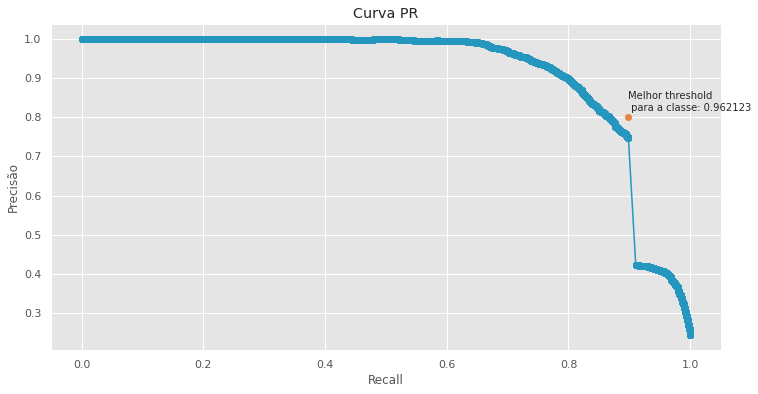

outra tentativa 0.9144314582286764
0.4061595557723193
logisticRegression


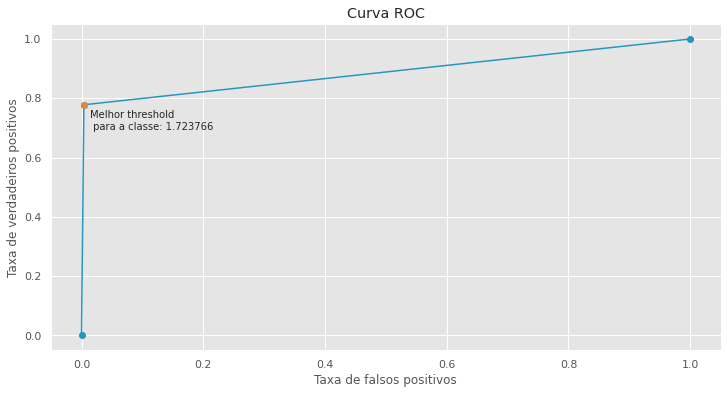

Best Threshold=1.000000, F-Score=0.721
Best 2o Threshold=1.000000, F-Score=0.650


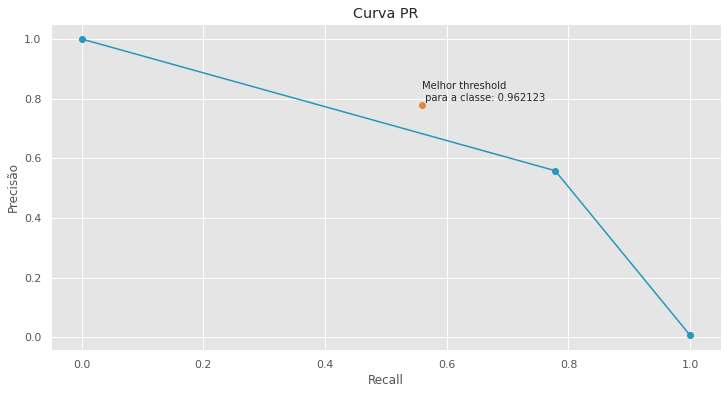

outra tentativa 0.6690500242396965
1.0


KeyboardInterrupt: 

In [11]:
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
from sklearn.metrics import auc

plt.style.use('ggplot')

for app in appliances:
    for tec in techniques:
        df = open_csv_as_df(tec, app, 1, is_test=True)

        df = df.copy()
        df.loc[:, 'ligado'] = df['ligado'].astype(int)
        df.loc[:, 'saidas'] = df['saidas'].astype(float)
        # df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 0 if x < 0 else x)


        fpr, tpr, thresholds = roc_curve(df.ligado, df.saidas)

        # Plot the ROC curve
        df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
        df_fpr_tpr.head()

        # Calculate the G-mean
        gmean = np.sqrt(tpr * (1 - fpr))

        # Find the optimal threshold
        index = np.argmax(gmean)
        thresholdOpt = round(thresholds[index], ndigits = 4)
        gmeanOpt = round(gmean[index], ndigits = 4)
        fprOpt = round(fpr[index], ndigits = 4)
        tprOpt = round(tpr[index], ndigits = 4)
        print(tec)
        thresholds_roc[tec]= thresholdOpt 


        #plot ROC curve
        fig, axs = plt.subplots(figsize=(12, 6))
        plt.plot(fpr, tpr,'o-', color='#2596be')
        # plt.plot(fpr, tpr, 'o')
        plt.title('Curva ROC')
        # plt.title('ROC Curve')
        plt.xlabel('Taxa de falsos positivos')
        # plt.xlabel('False Positive Rate')
        plt.ylabel('Taxa de verdadeiros positivos')
        # plt.ylabel('True Positive Rate')

        # Best threshold
        plt.plot([fprOpt], [tprOpt], 'o', color = '#e28743')
        # plt.geom_line(fpr, tpr)
        thresholdOpt = 1.723766
        plt.text(fprOpt+0.01, tprOpt-0.085, 'Melhor threshold \n para a classe: {}'.format(thresholdOpt))
        # plt.text(fprOpt, tprOpt+0.015, 'Optimal threshold \n for class: {}'.format(thresholdOpt))
        where_to_save = 'curva_roc_'+app+'_'+tec+'.eps'
        plt.savefig(where_to_save, format='eps')
        plt.show()


        # calculate pr-curve
        precision, recall, thresholds = precision_recall_curve(df.ligado, df.saidas)
        ...
        # convert to f score
        beta= 2
        fscore = ((1+beta*beta) * precision * recall) / ((beta*beta*precision) + recall)
        # fscore = (2 * precision * recall) / (precision + recall)
        # locate the index of the largest f score
        ix = np.argmax(fscore)
        thresholdOpt = round(thresholds[ix], ndigits = 4)
        print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
        # thresholds_pr[tec]= thresholds[ix]
        thresholds_pr[app][tec]= thresholds[ix] #TODO aqui ta o threshold

        fscore = (2 * precision * recall) / (precision + recall)
        # locate the index of the largest f score
        ix = np.argmax(fscore)
        thresholdOpt = round(thresholds[ix], ndigits = 4)
        print('Best 2o Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
        # thresholds_pr[tec]= thresholds[ix]
        thresholds_pr[app][tec]= thresholds[ix] #TODO aqui ta o threshold


        #plot PR curve
        fig, axs = plt.subplots(figsize=(12, 6))
        plt.plot(recall, precision,'o-', color='#2596be')
        # plt.plot(fpr, tpr, 'o')
        plt.title('Curva PR')
        # plt.title('PR Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precisão')
        # plt.ylabel('Precision')

        # Best threshold
        plt.plot(precision[ix], recall[ix], 'o', color = '#e28743')
        # plt.geom_line(fpr, tpr)
        thresholdOpt= 0.962123
        plt.text(precision[ix], recall[ix]+0.015, 'Melhor threshold \n para a classe: {}'.format(thresholdOpt))
        # plt.text(precision[ix], recall[ix]+0.015, 'Optimal threshold \n for class: {}'.format(thresholdOpt))
        where_to_save = 'curva_pr_'+app+'_'+tec+'.eps'
        plt.savefig(where_to_save, format='eps')
        plt.show()


        precision, recall, _thresholds = precision_recall_curve(df.ligado, df.saidas)
        pr_auc = auc(recall, precision)
        print('outra tentativa', pr_auc)
        # thresholds_pr[app][tec]= pr_auc

        # plt.clf()
        # plt.plot(recall, precision, label='P/R curve')
        # plt.grid()
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.ylim([0.0, 1.05])
        # plt.xlim([0.0, 1.0])
        # plt.title('Precision-Recall: AUC=%0.2f' % pr_auc)
        # plt.legend(loc="best")
        # plt.show()


        predicted_proba = df.saidas
        precision_, recall_, proba = precision_recall_curve(df.ligado, df.saidas)
        optimal_proba_cutoff = sorted(list(zip(np.abs(precision_ - recall_), proba)), key=lambda i: i[0], reverse=False)[0][1]
        print(optimal_proba_cutoff)
        # roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in df.saidas[:, -1]]
        # df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 0 if x < optimal_proba_cutoff else 1)
        # thresholds_pr[app][tec]= optimal_proba_cutoff







# print(thresholds_pr)


In [6]:
# results_df = pd.DataFrame(columns=['app', 'tec', 'house', 'recall', 'accuracy', 'precision', 'f1'])

# def apply_threshold(df, threshold):
#     df = df.copy()
#     df.loc[:, 'ligado'] = df['ligado'].astype(int)
#     df.loc[:, 'saidas'] = df['saidas'].astype(int)
#     df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1 if x > threshold else 0)
#     return df

# app='dish washer'

# techniques = ['ANN']
# # techniques = ['CNN']
# # techniques = ['GRU']


# thresholds_pr = {'kettle': {'ANN': 0.962123, 'CNN': 0.9442539628177162, 'GRU': 0.9144314582286764},
#                  'toaster': {'ANN': 0.4651746613790504, 'CNN': 1.2497629493591376, 'GRU': 0.4214651086949743},
#                  'dish washer': {'ANN': 0.5735587517359696, 'CNN': 0.7035587517359696, 'GRU': 0.7553680696795063}}


# for tec in techniques:
#     for house in homes:
#         if house == 'test':
#             df = open_csv_as_df(tec, app, 1, is_test=True)
#         else:
#             df = open_csv_as_df(tec, app, house)

#         thresholds = [0.5735587517359696, 0.73]
#         for threshold in thresholds:
#             df_apply = apply_threshold(df, threshold)
#             results_df = calculate_metrics(df_apply, results_df)
# print(results_df)






In [12]:
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt

# matplotlib.rc('font', size=MEDIUM_SIZE)
# matplotlib.rc('axes', titlesize=BIGGER_SIZE)

# threshold_df = pd.read_csv('resultados.csv', sep=',')
results_df = pd.DataFrame(columns=['app', 'tec', 'house', 'recall', 'accuracy', 'precision', 'f1', 'TP', 'TN', 'FP', 'FN', 'P', 'N'])
# results_df = pd.DataFrame(columns=['app', 'tec', 'house', 'recall', 'accuracy', 'precision', 'f1'])


# thresholds_pr = {'kettle': {'ANN': 0.7820435670049241, 'CNN': 0.3689097998042901, 'GRU': 0.07172139446871978},
#                  'toaster': {'ANN': 0.582139556871978, 'CNN': 1.2497629493591376, 'GRU': 0.4214651086949743},
#                  'dish washer': {'ANN': 0.5735587517359696, 'CNN': 0.7035587517359696, 'GRU': 0.7553680696795063}}


#versao v2
thresholds_pr = {'kettle': {'ANN': 0.962123, 'CNN': 0.9442539628177162, 'GRU': 0.9144314582286764},
                 'toaster': {'ANN': 0.4651746613790504, 'CNN': 1.2497629493591376, 'GRU': 0.4214651086949743},
                 'dish washer': {'ANN': 0.5735587517359696, 'CNN': 0.7035587517359696, 'GRU': 0.7553680696795063}}


def apply_threshold(df, threshold):
    df = df.copy()
    df.loc[:, 'ligado'] = df['ligado'].astype(int)
    df.loc[:, 'saidas'] = df['saidas'].astype(int)
    df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1 if x > threshold else 0)
    return df



for app in appliances:
    for tec in techniques:
        for house in homes:
            if house == 'test':
                df = open_csv_as_df(tec, app, 1, is_test=True)
            else:
                df = open_csv_as_df(tec, app, house)
            if tec in ['ANN', 'CNN', 'GRU']:
                if app in ['toaster', 'dish washer', 'microwave'] and house in [2,5]:
                    continue
                threshold = thresholds_pr[app][tec]
                df = apply_threshold(df, threshold)


            results_df = calculate_metrics(df, results_df)

            # df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1.02 if x ==1 or x ==True else 0)
            # # test = test.set_index('time')
            # plt.xlabel('Timestamp')
            # plt.plot(df.index, df['ligado'], label = 'ligado')
            # plt.plot(df.index, df['saidas'], label = "ligado_predicao")
            # # plt.title(label='Resultados', fontdict= {'fontsize': rcParams['axes.titlesize'],
            # # 'fontweight' : rcParams['axes.titleweight'],
            # # 'verticalalignment': 'baseline',
            # # 'horizontalalignment': 'center'})
            # plt.ylabel('Resultado')
            # plt.legend()
            # where_to_save = 'resultado_'+app+'_'+tec+'_'+str(house)+'.eps'
            # # plt.savefig(where_to_save, format='eps')
            # plt.show()
                        
            results_df.to_csv('results/final_results_complete.csv', sep=',', header=True, index=True)


results_df.to_csv('results/final_results_complete.csv', sep=',', header=True, index=True)        

/home/tokyo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tokyo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tokyo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tokyo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWar